# Find the average rank of the 10 most popular movies between 2000-2009 (inclusive)

In [1]:
import pandas as pd
import numpy as np

In [2]:
ratings = pd.read_csv("D:/DataScience/DADV/Assignment-1/Data/Ratings.tsv", delimiter = '\t')

In [3]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1702
1,tt0000002,6.1,210
2,tt0000003,6.5,1462
3,tt0000004,6.2,123
4,tt0000005,6.2,2262


In [4]:
basics_movie = pd.read_csv("D:/DataScience/DADV/Assignment-1/Data/Title_Basics.tsv", delimiter = '\t')

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
basics_movie.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
basics_movie.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [7]:
basics_movie['startYear'] = pd.to_numeric(basics_movie['startYear'], errors='coerce')

In [8]:
basics_movie.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult            object
startYear         float64
endYear            object
runtimeMinutes     object
genres             object
dtype: object

In [9]:
basics_filter_by_year = basics_movie[(basics_movie.startYear >= 2000) & (basics_movie.startYear <= 2009)]
basics_filter_by_year

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
15181,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N
18034,tt0018295,short,El puño de hierro,El puño de hierro,0,2004.0,\N,40,"Action,Drama,Short"
33808,tt0034413,short,Youth Gets a Break,Youth Gets a Break,0,2001.0,\N,20,Short
34808,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance"
35548,tt0036177,movie,Muhomatsu no issho,Muhomatsu no issho,0,2008.0,\N,100,"Action,Adventure"
...,...,...,...,...,...,...,...,...,...
7936870,tt9916794,tvEpisode,Episode #2.33,Episode #2.33,0,2009.0,\N,\N,"Action,Drama,Family"
7936871,tt9916796,tvEpisode,Episode #2.34,Episode #2.34,0,2009.0,\N,\N,"Action,Drama,Family"
7936872,tt9916798,tvEpisode,Episode #2.36,Episode #2.36,0,2009.0,\N,\N,"Action,Drama,Family"
7936873,tt9916800,tvEpisode,Episode #2.35,Episode #2.35,0,2009.0,\N,\N,"Action,Drama,Family"


In [10]:
basics_rating_merged = pd.merge(basics_filter_by_year, ratings, on='tconst')
basics_rating_merged.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N,5.4,11
1,tt0018295,short,El puño de hierro,El puño de hierro,0,2004.0,\N,40,"Action,Drama,Short",6.6,31
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance",6.4,79860
3,tt0036177,movie,Muhomatsu no issho,Muhomatsu no issho,0,2008.0,\N,100,"Action,Adventure",7.2,82
4,tt0067230,short,I Miss Sonia Henie,I Miss Sonia Henie,0,2009.0,\N,20,"Comedy,Short",5.7,328


In [11]:
basics_rating_merged_only_movies = basics_rating_merged.loc[basics_rating_merged['titleType'] == 'movie']
basics_rating_merged_only_movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N,5.4,11
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance",6.4,79860
3,tt0036177,movie,Muhomatsu no issho,Muhomatsu no issho,0,2008.0,\N,100,"Action,Adventure",7.2,82
5,tt0079644,movie,November 1828,November 1828,0,2001.0,\N,140,"Drama,War",7.2,30
6,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,\N,100,"Comedy,Horror,Sci-Fi",5.3,286
...,...,...,...,...,...,...,...,...,...,...,...
256597,tt9815124,movie,Mami Jarum,Mami Jarum,0,2002.0,\N,95,Comedy,5.1,22
256646,tt9874290,movie,Star Trek: Incident at Beta 9,Star Trek: Incident at Beta 9,0,2002.0,\N,57,Sci-Fi,4.6,7
256647,tt9876412,movie,Star Trek: The Final Darkness,Star Trek: The Final Darkness,0,2004.0,\N,85,Sci-Fi,4.4,5
256662,tt9881364,movie,Gaja,Gaja,0,2008.0,\N,\N,"Action,Comedy,Romance",7.5,44


In [12]:
popular_movies = basics_rating_merged_only_movies.sort_values('numVotes', ascending = False)

In [13]:
print(popular_movies.head(10)['averageRating'].mean())

8.580000000000002


# Find the year in the 1900s when the average rank increased the most, compared to the previous year.(Ignore movies with votes < 1000)

In [14]:
ratings_filter_by_votes = ratings[ratings['numVotes'] > 1000]
ratings_filter_by_votes

,tconst,averageRating,numVotes
0,tt0000001,5.7,1702
2,tt0000003,6.5,1462
4,tt0000005,6.2,2262
7,tt0000008,5.5,1875
9,tt0000010,6.9,6339
...,...,...,...
1155534,tt9913050,8.3,1261
1155639,tt9913754,7.2,1015
1155656,tt9914552,9.0,1010
1155713,tt9916270,5.8,1060


In [15]:
basics_ratings_merged = pd.merge(ratings_filter_by_votes, basics_movie, on = 'tconst')
basics_ratings_merged.head(5)

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1702,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short"
1,tt0000003,6.5,1462,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance"
2,tt0000005,6.2,2262,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short"
3,tt0000008,5.5,1875,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894.0,\N,1,"Documentary,Short"
4,tt0000010,6.9,6339,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895.0,\N,1,"Documentary,Short"


In [16]:
basics_ratings_merged_filter_by_year = basics_ratings_merged[(basics_ratings_merged['startYear'] >= 1900) & (basics_ratings_merged['startYear'] < 2000)]
basics_ratings_merged_filter_by_year.head(5)

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
20,tt0000300,6.9,1095,short,The Enchanted Drawing,The Enchanted Drawing,0,1900.0,\N,2,"Animation,Comedy,Fantasy"
21,tt0000304,6.0,1072,short,Grandma's Reading Glass,Grandma's Reading Glass,0,1900.0,\N,2,"Family,Short"
22,tt0000359,7.1,2635,short,The India Rubber Head,L'homme à la tête en caoutchouc,0,1901.0,\N,3,"Comedy,Fantasy,Short"
23,tt0000417,8.2,45154,short,A Trip to the Moon,Le voyage dans la lune,0,1902.0,\N,13,"Adventure,Comedy,Fantasy"
24,tt0000420,6.3,2423,short,Alice in Wonderland,Alice in Wonderland,0,1903.0,\N,8,"Family,Fantasy,Short"


In [17]:
average_ratings_by_year = basics_ratings_merged_filter_by_year.groupby('startYear').agg(avgR = ('averageRating', np.mean)).reset_index()
average_ratings_by_year.head(5)

,startYear,avgR
0,1900.0,6.633333
1,1901.0,6.966667
2,1902.0,8.200000
3,1903.0,6.177778
4,1904.0,6.700000


In [18]:
flag = 0
final_year = 0
for i in range(1, len(average_ratings_by_year)):
    a = average_ratings_by_year.loc[i, 'avgR']
    b = average_ratings_by_year.loc[i-1, 'avgR']
    temp = a - b
    if temp > flag:
        flag = temp
        final_year = average_ratings_by_year.loc[[i], ['startYear']]
final_year

,startYear
2,1902.0


# Find the expected average rank for 2013 using linear regression. How good is this regression? (Ignore movies with votes < 1000.)


In [19]:
basics_rating_merged = pd.merge(ratings, basics_movie, on = 'tconst')
basics_rating_merged

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1702,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short"
1,tt0000002,6.1,210,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,\N,5,"Animation,Short"
2,tt0000003,6.5,1462,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance"
3,tt0000004,6.2,123,short,Un bon bock,Un bon bock,0,1892.0,\N,12,"Animation,Short"
4,tt0000005,6.2,2262,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...,...
1155728,tt9916682,5.6,5,tvEpisode,Horrid Henry It's all Your Fault,Horrid Henry It's all Your Fault,0,2012.0,\N,10,"Animation,Comedy,Family"
1155729,tt9916690,6.6,5,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012.0,\N,10,"Animation,Comedy,Family"
1155730,tt9916720,6.5,82,short,The Nun 2,The Nun 2,0,2019.0,\N,10,"Comedy,Horror,Mystery"
1155731,tt9916766,6.9,17,tvEpisode,Episode #10.15,Episode #10.15,0,2019.0,\N,43,"Family,Reality-TV"


In [20]:
basics_rating_merged_filter_by_year = basics_rating_merged[basics_rating_merged['numVotes']>= 1000]
basics_rating_merged_filter_by_year

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1702,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short"
2,tt0000003,6.5,1462,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance"
4,tt0000005,6.2,2262,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short"
7,tt0000008,5.5,1875,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894.0,\N,1,"Documentary,Short"
9,tt0000010,6.9,6339,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895.0,\N,1,"Documentary,Short"
...,...,...,...,...,...,...,...,...,...,...,...
1155534,tt9913050,8.3,1261,tvEpisode,"The Boar Bares Its Fangs, Zenitsu Sleeps","The Boar Bares Its Fangs, Zenitsu Sleeps",0,2019.0,\N,24,"Action,Animation,Fantasy"
1155639,tt9913754,7.2,1015,tvEpisode,Psalm 46:5,Psalm 46:5,0,2020.0,\N,50,"Action,Drama,Fantasy"
1155656,tt9914552,9.0,1010,short,The Curtain,The Curtain,0,2019.0,\N,\N,"Mystery,Short"
1155713,tt9916270,5.8,1060,movie,Il talento del calabrone,Il talento del calabrone,0,2020.0,\N,84,Thriller


In [21]:
avg_rating_by_year = basics_rating_merged_filter_by_year.groupby('startYear').agg(avgR = ('averageRating', np.mean)).reset_index()

In [22]:
avg_rating_by_year

,startYear,avgR
0,1874.0,6.900000
1,1878.0,7.400000
2,1887.0,5.200000
3,1888.0,6.500000
4,1890.0,5.000000
...,...,...
131,2017.0,7.194159
132,2018.0,7.140170
133,2019.0,7.206091
134,2020.0,7.138565


In [23]:
train_rating_avg = avg_rating_by_year[avg_rating_by_year.startYear != 2013]
train_rating_avg

,startYear,avgR
0,1874.0,6.900000
1,1878.0,7.400000
2,1887.0,5.200000
3,1888.0,6.500000
4,1890.0,5.000000
...,...,...
131,2017.0,7.194159
132,2018.0,7.140170
133,2019.0,7.206091
134,2020.0,7.138565


In [24]:
from sklearn.linear_model import LinearRegression


In [25]:
x_train = train_rating_avg['startYear'].values.reshape(-1,1)
y_train = train_rating_avg['avgR'].values.reshape(-1,1)

In [26]:
model = LinearRegression().fit(x_train,y_train)

In [27]:
xtest = np.array([2013]).reshape(-1,1)
prediction = model.predict(xtest)
print(prediction)

[[7.01441742]]


In [28]:
# To visualize
import matplotlib.pyplot as plt  

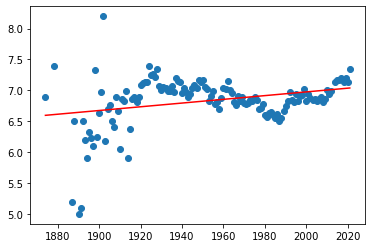

In [29]:
temp_pred = model.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, temp_pred, color='red')
plt.show()

# Find the correlation between rank and votes for each year in the 1900s. By how much did the correlation coefficient grow each year? How good is this regression?


In [30]:
corrl_year = basics_movie[(basics_movie['startYear']>= 1900) & (basics_movie['startYear'] < 2000)]

In [31]:
corrl_Data = pd.merge(ratings, corrl_year, on='tconst')
corrl_Data

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000160,5.4,11,short,The Last Days of Pompeii,The Last Days of Pompeii,0,1900.0,\N,\N,"Drama,Short"
1,tt0000265,4.3,103,short,Above the Limit,Above the Limit,0,1900.0,\N,\N,"Comedy,Short"
2,tt0000269,4.9,100,short,"Army Life; or, How Soldiers Are Made: Mounted ...",Army Life,0,1900.0,\N,\N,"Documentary,Short"
3,tt0000271,6.2,8,short,Arrivée de Pierette et Pierrot,Arrivée de Pierette et Pierrot,0,1900.0,\N,\N,Short
4,tt0000272,5.6,712,short,As Seen Through a Telescope,As Seen Through a Telescope,0,1900.0,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...,...
371278,tt9909866,4.2,11,video,Nora,Nora,0,1985.0,\N,45,"Action,Adventure,Animation"
371279,tt9914702,7.2,15,tvEpisode,Episode dated 5 February 1988,Episode dated 5 February 1988,0,1988.0,\N,\N,\N
371280,tt9915498,5.8,6,video,R. Kelly: If I Could Turn Back the Hands of Time,R. Kelly: If I Could Turn Back the Hands of Time,0,1999.0,\N,\N,"Music,Short"
371281,tt9915946,6.2,6,movie,Nuestra película,Nuestra película,0,1993.0,\N,96,Documentary


In [32]:
years = list(corrl_Data['startYear'].unique())
correlation_year = pd.DataFrame()
for year in years:
    each_year =corrl_Data[corrl_Data['startYear']==year].iloc[:,[1,2]]
    corr = each_year.corr()
    corr = corr['averageRating'][1]
    newRow = {'Correlation':corr,'Year':year}
    correlation_year = correlation_year.append(newRow, ignore_index=True)
correlation_year = correlation_year.reindex(columns=['Year', 'Correlation'])
correlation_year

,Year,Correlation
0,1900.0,0.234049
1,1901.0,0.263211
2,1902.0,0.207302
3,1903.0,0.167452
4,1904.0,0.277203
...,...,...
95,1999.0,0.028860
96,1998.0,0.021959
97,1994.0,0.033959
98,1997.0,0.021075


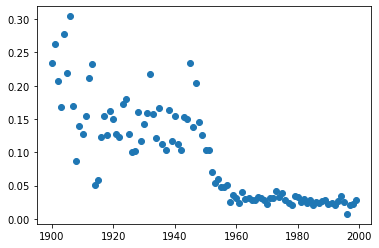

In [33]:
import matplotlib.pyplot
import pylab
matplotlib.pyplot.scatter(correlation_year['Year'],correlation_year['Correlation'])

<BarContainer object of 100 artists>

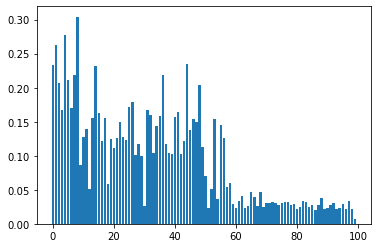

In [34]:
plt.bar(np.arange(len(correlation_year['Year'])), correlation_year['Correlation'])
